## Matias Padron Michelle Yanez - Red Neuronal Artificial


In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Importar para llamar a la funcion en multicapa
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential 
from keras.layers import Dense


In [9]:
data = pd.read_csv('data_evaluacion_limpia_categorical.csv')
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,edad,clase_trabajo,peso_final,educacion,num_educacion,estado_civil,ocupacion,relacion,raza,ganancia_capital,perdida_capital,horas_por_semana,pais,sexo,salario
0,50,6,83311,10,13,3,4,1,5,0,0,13,39,True,False
1,38,4,215646,12,9,1,6,2,5,0,0,40,39,True,False
2,53,4,234721,2,7,3,6,1,3,0,0,40,39,True,False
3,28,4,338409,10,13,3,10,6,3,0,0,40,5,False,False
4,37,4,284582,13,14,3,4,6,5,0,0,40,39,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,4,215419,10,13,1,10,2,5,0,0,36,39,False,False
48837,64,4,321403,12,9,7,3,3,3,0,0,40,39,True,False
48838,38,4,374983,10,13,3,10,1,5,0,0,50,39,True,False
48839,44,4,83891,10,13,1,1,4,2,5455,0,40,39,True,False


In [10]:
x=data.iloc[:,0:13].values 
y=data.iloc[:,14].values 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
modelo = Sequential()
modelo.add(Dense(24,activation='relu',input_shape = [13]))
modelo.add(Dense(20,activation='relu'))
modelo.add(Dense(16,activation='relu'))
modelo.add(Dense(12,activation='relu'))
modelo.add(Dense(8,activation='relu'))
#Salida
modelo.add(Dense(1,activation='sigmoid'))

# Configuración del modelo

modelo.compile(

    loss="binary_crossentropy",  #Se aplica la perdida binary_crossentropy dado que la etiqueta salario es binaria (True / False)
    optimizer = "adam",
    metrics = ["accuracy"]
    
)

C:\Users\MATIAS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
historial = modelo.fit(x_train,y_train, epochs = 50,batch_size=10)

Epoch 1/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7051 - loss: 132.7021
Epoch 2/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7600 - loss: 0.5521
Epoch 3/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7637 - loss: 0.5469
Epoch 4/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7634 - loss: 0.5472
Epoch 5/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7589 - loss: 0.5524
Epoch 6/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7578 - loss: 0.5536
Epoch 7/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7600 - loss: 0.5511
Epoch 8/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7579 - loss: 0.5536
Epoch 9/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7595 - loss: 0.5517
Epoch 10/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7594 - loss: 0.5518
Epoch 11/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7644 - loss: 0.5459
Epoch 12/50
3419/

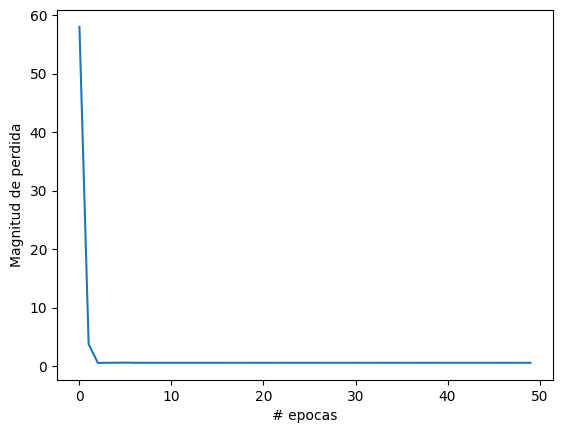

In [79]:
plt.xlabel("# epocas")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

## Evaluacion del modelo

In [17]:
#EVALUACION
modelo.evaluate(x_test,y_test)

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7670 - loss: 0.5431


[0.5487524271011353, 0.7620282769203186]

In [18]:
# Evaluar el modelo en los datos de entrenamiento
train_loss, train_accuracy = modelo.evaluate(x_train, y_train)
print('Train Accuracy:', train_accuracy * 100, "%")

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = modelo.evaluate(x_test, y_test)
print('Test Accuracy:', test_accuracy * 100, "%")

1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7597 - loss: 0.5514
Train Accuracy: 76.01497769355774 %
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7670 - loss: 0.5431
Test Accuracy: 76.20282769203186 %


In [19]:
y_pred = modelo.predict(x_test)
y_pred

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.24078885],
       [0.24078885],
       [0.24078885],
       ...,
       [0.24078885],
       [0.24078885],
       [0.24078885]], dtype=float32)

In [20]:
y_pred = modelo.predict(x_test)
y_pred

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.24078885],
       [0.24078885],
       [0.24078885],
       ...,
       [0.24078885],
       [0.24078885],
       [0.24078885]], dtype=float32)

In [59]:
y_test = y_test.astype(int)
y_test 


array([0, 0, 0, ..., 0, 0, 1])

In [26]:
y_pred_bin = np.argmax(y_pred, axis=1)
y_pred_bin

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.20%


In [64]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.20%


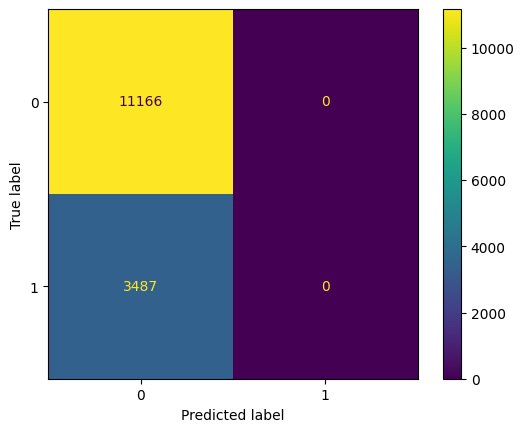

In [28]:
# Visualizar la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_bin), display_labels=[0, 1])
disp.plot()